## Create Open AI Model and validate using invoke


In [105]:
import os
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
# open_ai_model = ChatOpenAI(model="gpt-4o", temperature=0)  # Initialize the language model
open_ai_model = ChatOpenAI()
open_ai_model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x11bfb8340>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x11bfbb460>, root_client=<openai.OpenAI object at 0x11bfbab90>, root_async_client=<openai.AsyncOpenAI object at 0x11bfb93c0>, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [106]:
open_ai_model.invoke("hello how are you my firend?")


AIMessage(content="Hello! I'm just a AI assistant, so I don't have feelings like humans do. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bst6unYY587vLmWNt3BIf0A0GlW7d', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--72a71413-2846-461c-a56b-7e7e565225ef-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Create Open AI Embeddings and validate using embed_query

In [6]:
from langchain_openai import OpenAIEmbeddings
openai_embeddings = OpenAIEmbeddings(model="text-embedding-3-large")  # Initialize embeddings
openai_embeddings

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x10d39ba30>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x10d39bbe0>, model='text-embedding-3-large', dimensions=None, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [7]:
openai_embeddings.embed_query("hello how are you my firend?")

[-0.011972351931035519,
 0.0002769549028016627,
 -0.009868033230304718,
 -0.030911220237612724,
 0.011957988142967224,
 0.012036989443004131,
 -0.003107999684289098,
 -0.0040973168797791,
 -0.011462432332336903,
 0.028699170798063278,
 -0.02250830829143524,
 -0.02204866334795952,
 -0.010614958591759205,
 0.03450220823287964,
 -0.005907174199819565,
 0.04432714730501175,
 -0.0007078733760863543,
 -0.00995421689003706,
 -0.004474370274692774,
 0.008683007210493088,
 -7.49618629924953e-05,
 0.01151270605623722,
 -0.016590362414717674,
 0.022695040330290794,
 -0.01366729848086834,
 0.03073885291814804,
 -0.0034311884082853794,
 0.009587936103343964,
 -0.028742263093590736,
 -0.025869473814964294,
 -0.02176138386130333,
 0.010320497676730156,
 0.02227848581969738,
 0.05058982968330383,
 0.04378131777048111,
 -0.004653919488191605,
 0.019147144630551338,
 0.0027093999087810516,
 0.007612893357872963,
 0.022407760843634605,
 0.006575097795575857,
 0.03786337003111839,
 -0.01591525599360466,
 

## Load Data / Splitter / Create Vector DB (Embeddings/Vector) - https://lilianweng.github.io/posts/2023-06-23-agent/

In [9]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

urls = ["https://lilianweng.github.io/posts/2023-06-23-agent/", 
        "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering"]

docs = [WebBaseLoader(url).load() for url in urls]

docs_list = [item for doc in docs for item in doc]
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [11]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)
text_docs = text_splitter.split_documents(docs_list)
text_docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

## Create Retriever and test invoke

In [14]:
from langchain_community.vectorstores import Chroma
# Create a new vector store for the PDF documents

# Option 1
# vector_store_pdf = Chroma(
#     collection_name="rag-chrome",  # Name of the collection
#     embedding_function=openai_embeddings,  # Embedding function
#     persist_directory="./chroma_pdf_db"    # Directory to persist the database
# )

# vector_store_pdf.add_documents(text_docs)  # Add the PDF documents to the vector store

# Option 2
vector_store_pdf = Chroma.from_documents(
    collection_name="rag-chrome",  # Name of the collection
    embedding=openai_embeddings,  # Embedding function
    documents=text_docs
)

In [15]:
rag_retriever = vector_store_pdf.as_retriever(search_kwargs={"k": 3})  # Create a retriever)

In [16]:
rag_retriever.invoke("what is agent and prompt?")

[Document(metadata={'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'title': "Prompt Engineering | Lil'Log", 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering', 'language': 'en'}, page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model

## Convert to Tool / ToolNode & Retriever Node

In [26]:
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import display, Image
from langchain.agents import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.tools import create_retriever_tool
from langgraph.prebuilt import tools_condition

In [20]:
retriever_tool = create_retriever_tool(rag_retriever, "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )
tools = [retriever_tool]
retriever_node = ToolNode(tools)

In [21]:
import operator
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgenticState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [107]:
llm_with_bind = open_ai_model.bind_tools(tools)

In [108]:
from langchain_core.prompts import PromptTemplate
from langchain import hub

def LLM_Decision_Maker(state: AgenticState):
    print("----CALL LLM_DECISION_MAKE----")
    questions = state["messages"]
    last_message=questions[-1]
    question=last_message.content
        
    response = llm_with_bind.invoke(question)
    return {"messages": [response]}

# def LLM_Decision_Maker(state: AgenticState):
#     print("----CALL LLM_DECISION_MAKE----")
#     questions = state["messages"]

#     if len(questions) > 1:
#         last_message=questions[-1]
#         question=last_message.content

#         prompt = PromptTemplate(
#             template="""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
#                         Here is the question:{question}
#                         """,
#             input_variables=["question"]
#         )

#         chain = prompt | open_ai_model
#         response = chain.invoke({"question": question})
#         return {"messages":[response]}

#     else:
#         llm_with_bind = open_ai_model.bind_tools(tools)
#         response = llm_with_bind.invoke(questions)
#         return {"messages": [response]}

# def retriever_node(state: AgenticState):
#     pass

def generate(state: AgenticState):
    print("----RAG OUTPUT GENERATE----")
    
    message=state["messages"]
    question=message[0].content
    last_message = message[-1]
    docs = last_message.content

    prompt=hub.pull("rlm/rag-prompt")

    rag_chain=prompt | open_ai_model
    response=rag_chain.invoke({"context": docs, "question": question})

    print(f"this is my response:{response}")
    return {"messages": [response]}



def rewrite(state: AgenticState):
    print("----TRANSFORM QUERY----")
    message=state["messages"]
    
    question=message[0].content

    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=open_ai_model.invoke(input)
    
    return {"messages": [response]}


In [109]:
workflow = StateGraph(AgenticState)

In [110]:
workflow.add_node("LLM DECISION MAKER", LLM_Decision_Maker)
workflow.add_node("VECTOR RETRIEVER", retriever_node)
workflow.add_node("OUTPUT GENERATOR", generate)
workflow.add_node("QUERY REWRITER", rewrite)

In [111]:
from pydantic import BaseModel
from pydantic.fields import Field
class grade(BaseModel):
    binary_score: str=Field(description="Relevance score 'yes' or 'no'")

In [112]:
from typing import Literal


def grade_documents(state: AgenticState) -> Literal["OUTPUT GENERATOR", "QUERY REWRITER"]:
    llm_with_ops = open_ai_model.with_structured_output(grade)

    prompt=PromptTemplate(
    template="""You are a grader deciding if a document is relevant to a user's question.
                Here is the document: {context}
                Here is the user's question: {question}
                If the document talks about or contains information related to the user's question, mark it as relevant. 
                Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                input_variables=["context", "question"]
                )
    
    chain = prompt | llm_with_ops

    message=state['messages']
    last_message = message[-1]
    question = message[0].content
    docs = last_message.content

    response = chain.invoke({"question": question, "context": docs})

    score=response.binary_score

    if score == 'yes':
        print("----DECISION: DOCS ARE RELEVANT----")
        print("DOCS - ", docs)
        return "generator"

    print("----DECISION: DOCS ARE NOT RELEVANT----")
    print("DOCS - ", docs)
    return "rewriter"


In [113]:
workflow.add_edge(START, "LLM DECISION MAKER")
workflow.add_conditional_edges("LLM DECISION MAKER", 
                               tools_condition,
                               {
                                   "tools":"VECTOR RETRIEVER",
                                    END:END
                               })

workflow.add_conditional_edges("VECTOR RETRIEVER", 
                               grade_documents, 
                               {
                                   "generator": "OUTPUT GENERATOR",
                                   "rewriter": "QUERY REWRITER"
                               })
workflow.add_edge("OUTPUT GENERATOR", END)
workflow.add_edge("QUERY REWRITER", "LLM DECISION MAKER")

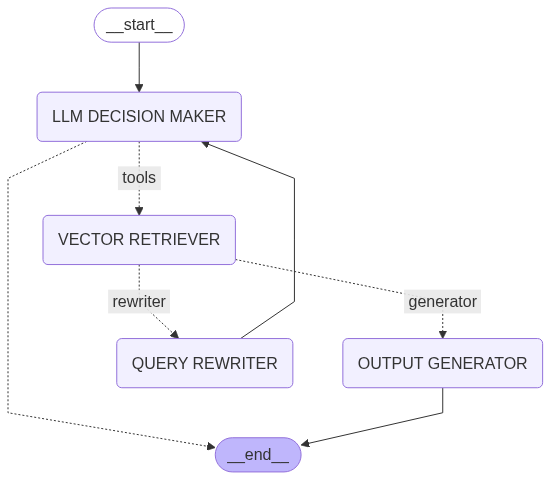

In [114]:
app = workflow.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM_DECISION_MAKE----
----DECISION: DOCS ARE RELEVANT----
DOCS -  
----RAG OUTPUT GENERATE----
this is my response:content='LLM Powered Autonomous Agents are agents that use Long-Short Term Memory models for decision-making. Planning involves determining the actions an agent will take to achieve a goal, while reflection involves evaluating past actions. Prompt engineering refers to designing prompts to guide agents in their decision-making process within Langchain, a blockchain-based language framework.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 90, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bst7v8gRgpBa3gl9cFVaWce9BTloR', 'service_tier': 'default'

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='21777ce3-563a-4414-b92d-24e1eb18a63e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dNGYfVJGuPiQdNDwg6ZkWoF6', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_SZBv1xoVyEswmooGhCFJETo4', 'function': {'arguments': '{"query": "planning and reflection in agents and LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_2Kl2SDDnhCQ9nuLTfHDgDHr1', 'function': {'arguments': '{"query": "prompt engineering in agents and LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 163, 'total_tokens': 247, 'completion_tokens_details

In [118]:
app.invoke({"messages":["hi how are you gpt?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='hi how are you gpt?', additional_kwargs={}, response_metadata={}, id='f41fba19-0e54-42cf-b234-77a9660b2855'),
  AIMessage(content="Hello! I'm here and ready to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 145, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bst839767QH3oybYMGBXNonQ04tij', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e42fee7-c341-4326-b400-93354e942ab7-0', usage_metadata={'input_tokens': 145, 'output_tokens': 19, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}

In [119]:
app.invoke({"messages":["what is a capital of india?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='efca54da-f4b1-487f-ba2c-f004b7248b75'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 145, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bst8B1rGFVxMefDnhEeLpUDjeVPSp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--850b0809-64b8-4ba7-b4bc-ec96567413b2-0', usage_metadata={'input_tokens': 145, 'output_tokens': 9, 'total_tokens': 154, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [120]:
question="can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?"
app.invoke({"messages":[question]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?', additional_kwargs={}, response_metadata={}, id='2c6d9564-91b2-4050-a92d-c930e029b2b1'),
  AIMessage(content='Task decomposition refers to breaking down a complex task into smaller, more manageable sub-tasks. By decomposing a task, models can focus on solving each sub-task independently, which can make it easier to learn and optimize the overall task.\n\nChain of Thought (CoT) is a prompting technique introduced by Wei et al. in 2022. It has become a standard method for enhancing model performance on complex tasks due to several reasons:\n\n1. **Sequential Reasoning**: CoT prompts models to reason sequentially, similar to how humans break down complex tasks. This sequential reasoning allows models to focus on one step at a time, leading to improved understanding of